# **Import Bibliotecas**

In [ ]:
# Libs necessarias
import pandas as pd
import numpy as np

# Lib graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Confiração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

# **Exploração dos dados**

In [ ]:
# Lendo os dados
Base_Dados = pd.read_csv('/content/house_data.csv')

# Dimensão
Base_Dados.shape

(10692, 13)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Verificar
Base_Dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
# Removendo colunas
Base_Dados.drop( columns=['fire insurance (R$)', 'total (R$)'], inplace=True )

In [ ]:
# renomeando colunas
Base_Dados.rename(columns={'city': 'cidade', 'floor': 'andar', 'animal': 'animais', 'furniture': 'moveis', 'area': 'm2' , 'rooms': 'quartos', 'bathroom': 'banheiro', 'parking spaces':'garagem', 'hoa (R$)':'condominio',
                           'rent amount (R$)':'aluguel (R$)', 'property tax (R$)': 'taxas (R$)'}, inplace = True)

In [ ]:
# renomeando str - txt/palavras em nos dados (linhas)
Base_Dados.replace({'furnished':'mobiliado', 'not furnished':'não mobiliado','acept':'aceita', 'not acept':'não aceita' }, inplace = True)

In [ ]:
Base_Dados.head()

,cidade,m2,quartos,banheiro,garagem,andar,animais,moveis,condominio,aluguel (R$),taxas (R$)
0,São Paulo,70,2,1,1,7,aceita,mobiliado,2065,3300,211
1,São Paulo,320,4,4,0,20,aceita,não mobiliado,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,aceita,não mobiliado,1000,2800,0
3,Porto Alegre,51,2,1,0,2,aceita,não mobiliado,270,1112,22
4,São Paulo,25,1,1,0,1,não aceita,não mobiliado,0,800,25


In [ ]:
# Verificar
Base_Dados.shape

(10692, 11)

In [ ]:
# Campos vazios
Base_Dados.isnull().sum().sort_values( ascending=False )

cidade          0
m2              0
quartos         0
banheiro        0
garagem         0
andar           0
animais         0
moveis          0
condominio      0
aluguel (R$)    0
taxas (R$)      0
dtype: int64

In [ ]:
# Campos unicos
Base_Dados.nunique()

cidade             5
m2               517
quartos           11
banheiro          10
garagem           11
andar             35
animais            2
moveis             2
condominio      1679
aluguel (R$)    1195
taxas (R$)      1243
dtype: int64

In [ ]:
# Tipos das colunas
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cidade        10692 non-null  object
 1   m2            10692 non-null  int64 
 2   quartos       10692 non-null  int64 
 3   banheiro      10692 non-null  int64 
 4   garagem       10692 non-null  int64 
 5   andar         10692 non-null  object
 6   animais       10692 non-null  object
 7   moveis        10692 non-null  object
 8   condominio    10692 non-null  int64 
 9   aluguel (R$)  10692 non-null  int64 
 10  taxas (R$)    10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [ ]:
# Tipo de colunas (Quantidade de cada tipo)
Base_Dados.dtypes.value_counts()

int64     7
object    4
dtype: int64

# **Exploração Analitica (EDA)**

In [ ]:
# Filtrar os tipos de colunas
Colunas_Categoricas = Base_Dados.columns[ Base_Dados.dtypes == object ]
Colunas_Numericas = Base_Dados.columns[ Base_Dados.dtypes != object ]

Colunas_Categoricas, Colunas_Numericas

(Index(['cidade', 'andar', 'animais', 'moveis'], dtype='object'),
 Index(['m2', 'quartos', 'banheiro', 'garagem', 'condominio', 'aluguel (R$)',
        'taxas (R$)'],
       dtype='object'))

In [ ]:
# Analise dos campos objetos
Base_Dados['cidade'].value_counts( normalize=True ) * 100

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: cidade, dtype: float64

In [ ]:
# Loop
for Coluna in Colunas_Categoricas:

  # Fazendo a analise
  Analise = Base_Dados[Coluna].value_counts( normalize=True ) * 100

  # Mostrando
  print( Coluna, '\n', Analise, '\n')

cidade 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: cidade, dtype: float64 

andar 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: andar, dtype: float64 

animais 
 aceita        77.777778
não aceita    22.222222
Name: animais, dtype: float64 

moveis 
 não mobiliado    75.626637
mobiliado        24.373363
Name: moveis, dtype: float64 



In [ ]:
# Ajustando o Andar
Base_Dados.loc[ Base_Dados['andar'] == '301' ]
Base_Dados.iloc[ 2562, 5 ] = 30

# Ajustar o '-'
Base_Dados['andar'] = Base_Dados['andar'].apply( lambda Registro : 0 if Registro == '-' else Registro )
Base_Dados['andar'] = pd.to_numeric( Base_Dados['andar'] )

In [ ]:
# Verificar
Base_Dados.head()

,cidade,m2,quartos,banheiro,garagem,andar,animais,moveis,condominio,aluguel (R$),taxas (R$)
0,São Paulo,70,2,1,1,7,aceita,mobiliado,2065,3300,211
1,São Paulo,320,4,4,0,20,aceita,não mobiliado,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,aceita,não mobiliado,1000,2800,0
3,Porto Alegre,51,2,1,0,2,aceita,não mobiliado,270,1112,22
4,São Paulo,25,1,1,0,1,não aceita,não mobiliado,0,800,25


In [ ]:
len( Colunas_Numericas )

7

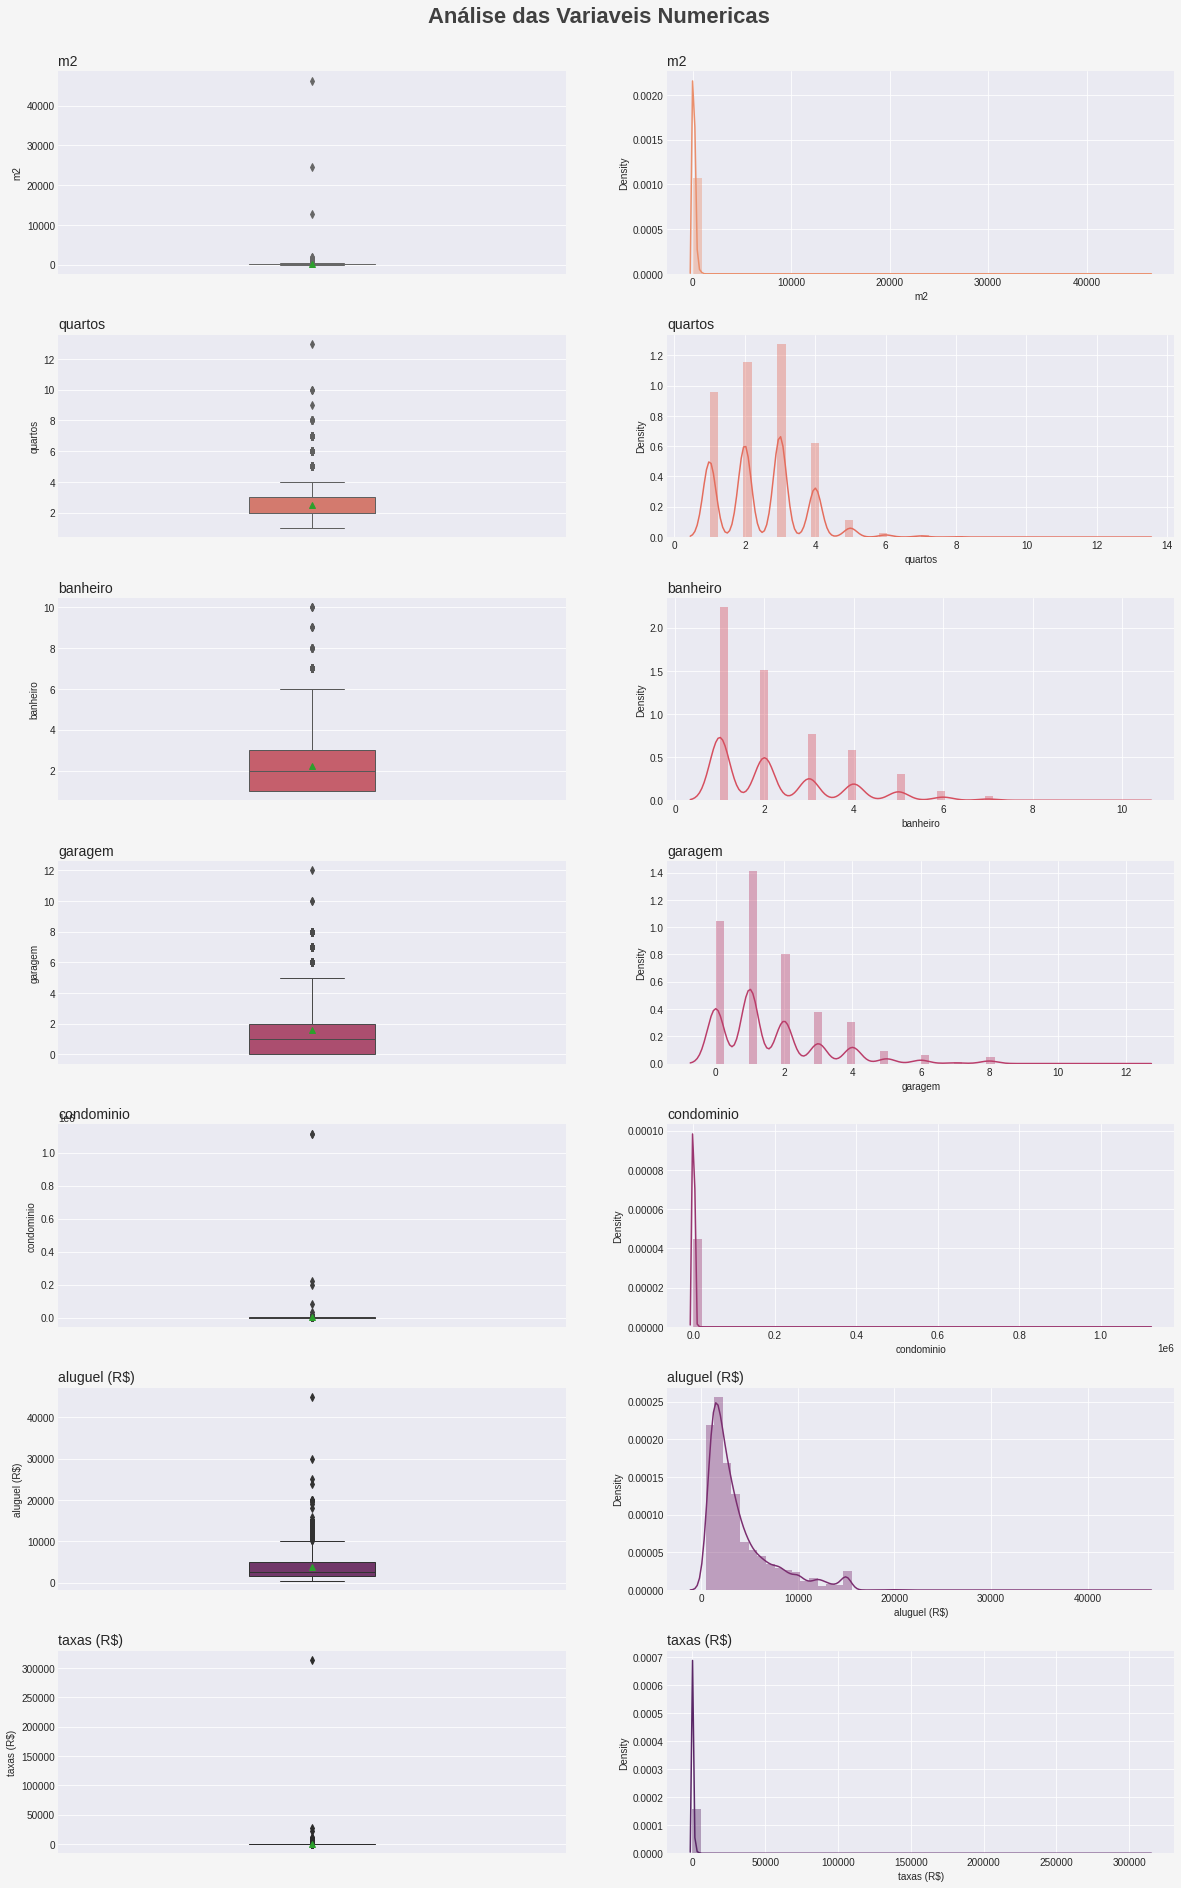

In [ ]:
# Grid - Gráficos
# Tamanho
Figura, Eixo = plt.subplots( figsize=(20, 30) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo )

# Paleta de Cores
Paleta_Cores = sns.color_palette( 'flare', len(Colunas_Numericas) * 2 )

# Titulo
plt.suptitle('Análise das Variaveis Numericas', fontsize=22, color='#404040', fontweight=600 )

# Estrutura
Linhas = 7 # (Todas as infos numericas)
Colunas = 2 #( Boxplot - Distplot)
Posicao = 1 # Posicao inicial do grid

# Loop para plotar os gráficos
for Coluna in Colunas_Numericas:

  # Plot no Grid -- Boxplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Titulo
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.boxplot( data=Base_Dados, y=Coluna, showmeans=True, saturation=0.75, 
              linewidth=1, color=Paleta_Cores[Posicao], width=0.25 )

  # Mudar
  Posicao += 1

  # Plot no Grid -- Distplot
  plt.subplot( Linhas, Colunas, Posicao )

  # Titulo
  plt.title( f'{Coluna}', loc='left', fontsize=14, fontweight=200 )

  # Plot
  sns.distplot( Base_Dados[Coluna], color=Paleta_Cores[ Posicao - 1 ] )

  # Mudar
  Posicao += 1

# Ajute de Grid
plt.subplots_adjust( top=0.95, hspace=0.3 )

# **Analisando outliers**

In [ ]:
Base_Dados.loc[ Base_Dados['m2'] <= 10000 ]['m2'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: m2, dtype: float64

In [ ]:
Base_Dados['condominio'].max()

1117000

In [ ]:
Base_Dados['condominio'].min()

0

In [ ]:
Base_Dados.loc[ Base_Dados['condominio'] <= 10000 ]['condominio'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: condominio, dtype: float64

In [ ]:
Base_Dados['condominio'].sort_values( ascending=False ).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: condominio, dtype: int64

In [ ]:
Base_Dados.iloc[ 225 ]

cidade           Porto Alegre
m2                         76
quartos                     1
banheiro                    1
garagem                     0
andar                       0
animais                aceita
moveis          não mobiliado
condominio                209
aluguel (R$)             1249
taxas (R$)                 52
Name: 225, dtype: object

In [ ]:
Base_Dados.iloc[ 6979 ]

cidade          Belo Horizonte
m2                         155
quartos                      1
banheiro                     4
garagem                      0
andar                        4
animais             não aceita
moveis           não mobiliado
condominio             1117000
aluguel (R$)              2790
taxas (R$)                  64
Name: 6979, dtype: object

In [ ]:
Base_Dados.iloc[ 6230 ]

cidade              São Paulo
m2                        340
quartos                     5
banheiro                    4
garagem                     2
andar                       7
animais                aceita
moveis          não mobiliado
condominio             220000
aluguel (R$)            12000
taxas (R$)               1000
Name: 6230, dtype: object

In [ ]:
Base_Dados.iloc[ 2928 ]

cidade          Rio de Janeiro
m2                          35
quartos                      1
banheiro                     1
garagem                      0
andar                        1
animais                 aceita
moveis               mobiliado
condominio               81150
aluguel (R$)              4500
taxas (R$)                9900
Name: 2928, dtype: object

In [ ]:
Base_Dados['aluguel (R$)'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: aluguel (R$), dtype: float64

In [ ]:
Base_Dados.loc[ Base_Dados['aluguel (R$)'] <= 40000]['aluguel (R$)'].describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: aluguel (R$), dtype: float64

In [ ]:
Base_Dados['taxas (R$)'].sort_values( ascending=False ).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: taxas (R$), dtype: int64

In [ ]:
Base_Dados.iloc[ 6645 ]

cidade              São Paulo
m2                         42
quartos                     1
banheiro                    2
garagem                     1
andar                       6
animais            não aceita
moveis          não mobiliado
condominio                690
aluguel (R$)             2500
taxas (R$)             313700
Name: 6645, dtype: object

In [ ]:
Base_Dados.tail()

,cidade,m2,quartos,banheiro,garagem,andar,animais,moveis,condominio,aluguel (R$),taxas (R$)
10687,Porto Alegre,63,2,1,1,5,não aceita,mobiliado,402,1478,24
10688,São Paulo,285,4,4,4,17,aceita,não mobiliado,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,não aceita,mobiliado,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,aceita,mobiliado,1585,12000,279
10691,São Paulo,80,2,1,0,0,aceita,não mobiliado,0,1400,165


# **Eng de Features**
### Analise das variáveis que vamos levar para o modelo


In [ ]:
# Ajuste das colunas categoricas
Base_Dados['animais'] = Base_Dados['animais'].map( {'aceita':1, 'não aceita':0} )
Base_Dados['moveis'] = Base_Dados['moveis'].map( {'mobiliado':1, 'não mobiliado':0} )

# Filtrar a Cidade de São Paulo
Filtro_SP = Base_Dados.loc[ Base_Dados['cidade'] == 'São Paulo']

# Verificar
Filtro_SP.head()

,cidade,m2,quartos,banheiro,garagem,andar,animais,moveis,condominio,aluguel (R$),taxas (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [ ]:
# Retirando a Coluna Cidade
Filtro_SP.drop( columns=['cidade'], inplace=True )

In [ ]:
Filtro_SP.head()

,m2,quartos,banheiro,garagem,andar,animais,moveis,condominio,aluguel (R$),taxas (R$)
0,70,2,1,1,7,1,1,2065,3300,211
1,320,4,4,0,20,1,0,1200,4960,1750
4,25,1,1,0,1,0,0,0,800,25
5,376,3,3,7,0,1,0,0,8000,834
7,213,4,4,4,4,1,0,2254,3223,1735


In [ ]:
# Separa os dados
Caracteristicas = Filtro_SP.drop( columns=['aluguel (R$)'] )
Previsor = Filtro_SP['aluguel (R$)']

# VErificar
Caracteristicas.shape, Previsor.shape

((5887, 9), (5887,))

In [ ]:
# Caracterticas
Caracteristicas.head()

,m2,quartos,banheiro,garagem,andar,animais,moveis,condominio,taxas (R$)
0,70,2,1,1,7,1,1,2065,211
1,320,4,4,0,20,1,0,1200,1750
4,25,1,1,0,1,0,0,0,25
5,376,3,3,7,0,1,0,0,834
7,213,4,4,4,4,1,0,2254,1735


In [ ]:
# Previsoor
Previsor.head()

0    3300
1    4960
4     800
5    8000
7    3223
Name: aluguel (R$), dtype: int64

In [ ]:
# Correlação
Filtro_SP.corr()

# Proxima de 1 - Correlação Possitva [ Ambas Sobem ]
# Proxima de -1 - Correlação Negativa [ Uma sobe outra desce ]

,m2,quartos,banheiro,garagem,andar,animais,moveis,condominio,aluguel (R$),taxas (R$)
m2,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
quartos,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
banheiro,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
garagem,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
andar,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animais,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
moveis,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
condominio,0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
aluguel (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
taxas (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


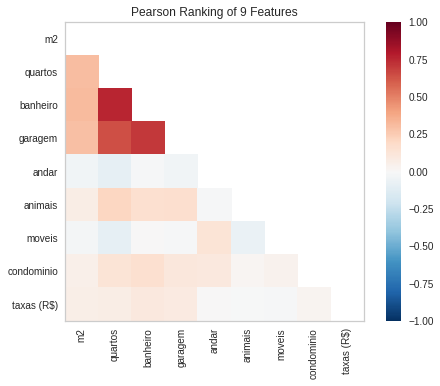

In [ ]:
# Yellowbrick
from yellowbrick.features import Rank2D

# Definir o metodo
Correlacao = Rank2D( algoritmo='pearson' )

# Fitar função
Correlacao.fit( Caracteristicas, Previsor )
Correlacao.transform( Caracteristicas )
Correlacao.show();

In [ ]:
# Separa os dadoos
from sklearn.model_selection import train_test_split

# Divisão dos dados
x_treino, x_teste, y_treino, y_teste = train_test_split(
    Caracteristicas, Previsor, test_size=0.2, random_state=10
)

print(f'Dados de Treino: { x_treino.shape[0] }')
print(f'Dados de Teste: { x_teste.shape[0] }')

Dados de Treino: 4709
Dados de Teste: 1178


In [ ]:
# Features mais relevantes
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# Selecao de features
def Selecao_Features( x_treino, y_treino ):

  # Configurar para selecionar as features
  Selecao = SelectKBest( score_func=mutual_info_regression, k=5 )

  # Fitar o aprendizado
  Selecao.fit( x_treino, y_treino )

  return Selecao

# Aplicar essa função
Scores = Selecao_Features( x_treino, y_treino )

# Analisar
for Posicao, Score in enumerate( Scores.scores_ ):
  print( f' { x_treino.columns[Posicao] } : {Score}' )

 m2 : 0.06019868626286229
 quartos : 0.25417942307080477
 banheiro : 0.29911915506850706
 garagem : 0.24719337299703792
 andar : 0.02973791222079525
 animais : 0.03794163878420864
 moveis : 0.04582933857164395
 condominio : 0.055768600520991196
 taxas (R$) : 0.18041315404232128


# **Construção do Modelo**

In [ ]:
# Modelo Random Forest Regresson
from sklearn.ensemble import RandomForestRegressor

# Instanciar
Modelo_Floresta = RandomForestRegressor( max_depth=5 )

# Fitar 
Modelo_Floresta.fit( x_treino, y_treino )

RandomForestRegressor(max_depth=5)

In [ ]:
# Avaliar a performance
Previsoes = Modelo_Floresta.predict( x_teste )

# Funcao para avaliar
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

print(f'RMSE: { sqrt(mean_squared_error( y_teste, Previsoes ) ) } ')
print(f'Score: { r2_score( y_teste, Previsoes ) } ')

RMSE: 2467.721911764095 
Score: 0.5592583300066536 


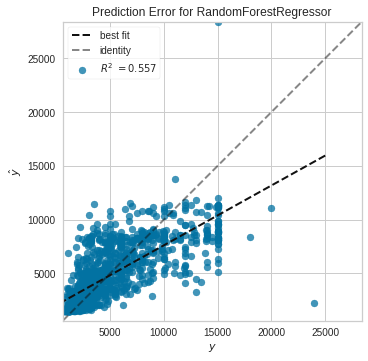

In [ ]:
# Avaliando Yellowbrick
from yellowbrick.regressor import PredictionError

# Instanciar
Modelo = RandomForestRegressor( max_depth=5 )
Erro_Modelo = PredictionError( Modelo )

# Fitar
Erro_Modelo.fit( x_treino, y_treino )
Erro_Modelo.score( x_teste, y_teste )
Erro_Modelo.show()

# **Exportação**

In [ ]:
# Exportando o modelo
import joblib

# Função
joblib.dump( Modelo_Floresta, 'Modelo_Floresta_Aleatorio_v100.pkl')

['Modelo_Floresta_Aleatorio_v100.pkl']

In [ ]:
# Testando o modelo treinado
Funcao_Modelo_Carregado = joblib.load('Modelo_Floresta_Aleatorio_v100.pkl')

In [ ]:
# Testando
Funcao_Modelo_Carregado.predict( x_teste.head(1).values )

array([1560.38066265])